<a href="https://colab.research.google.com/github/kyeonjae/doit_deeplearning/blob/main/Chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap4 이진분류

# 04-1 초기 인공지능 알고리즘과 로지스틱 회귀

# 04-2 시그모이드 함수로 확률 만들기

# 04-3 로지스틱 손실 함수를 경사하강법에 적용하기

분류의 정확도:

미분 가능한 함수가 아님 대신 이진 크로스 엔트로피 또는 로지스틱 손실함수를 사용함.

제곱 오차의 미분과 로지스틱 손실 함수의 미분값은 동일함!

# 04-4 분류용 데이터 세트 준비

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
cancer.data[0:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

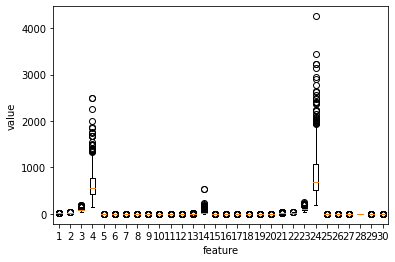

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
# 훈련 데이터 세트 저장
x = cancer.data
y = cancer.target

# 04-5 로지스틱 회귀를 위한 뉴런 만들기

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# 제대로 나누어졌는지 확인
print(x_train.shape, x_test.shape)

np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [ ]:
# 로지스틱 회귀 구현하기
class LogisticNueron:
  
  def __init__(self):
    self.w = None
    self.b = None
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  
  def activation(self, z):
    a = 1 / (1+ np.exp(-z)) # 시그모이드 계산
    return a
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

In [ ]:
# 모델 훈련하기
neuron = LogisticNueron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


In [ ]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


0.8245614035087719

# 04-6 로지스틱 회귀 뉴런으로 단일층 신경망 만들기

In [ ]:
# LogisticNueron 클래스를 복사해 SingleLayer로 바꾸기
class Singlelayer:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad

        # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 평균 손실 저장
      self.losses.append(loss/len(y))
  
  def activation(self, z):
    a = 1 / (1+ np.exp(-z)) # 시그모이드 계산
    return a
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [ ]:
# 단일층 신경망 훈련하기
layer = Singlelayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in exp


0.9298245614035088

In [ ]:
layer.losses

[8.299427578360687,
 6.0727518858649026,
 5.516082962831879,
 4.706382711445052,
 3.997894990890575,
 4.250926319789921,
 4.099107522268467,
 3.744863661991231,
 4.200320053646358,
 3.491832333273732,
 3.9472887249288617,
 4.301532585206097,
 3.7448636616275413,
 3.6436511307951878,
 4.149713787684645,
 3.9978949903450385,
 3.188194739321908,
 2.732738347666781,
 3.2894072705179513,
 3.1881947389582175,
 4.099107521722929,
 3.5424385990536003,
 3.542438599053606,
 2.8339508792265162,
 3.2894072705179465,
 2.6821320818869125,
 2.7327383476667775,
 2.6821320820687617,
 2.78334461344665,
 3.238801004556239,
 2.93516341024072,
 3.542438598871752,
 2.5809195505090083,
 2.7327383476667726,
 2.985769676202426,
 3.18819473914006,
 3.5930448644697814,
 2.83395087886282,
 3.4412260674938717,
 2.8339508792265167,
 2.7833446132647914,
 3.0869822073984805,
 3.2894072705179562,
 3.1375884733601933,
 2.530313284729141,
 2.7327383476667775,
 3.5930448646516244,
 3.2894072705179465,
 2.6315258161070414

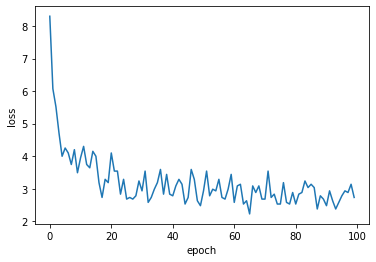

In [ ]:
# 손실함수 누적값 확인
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 04-7 사이킷런으로 로지스틱 회귀를 수행

In [ ]:
from sklearn.linear_model import SGDClassifier
# 로지스틱 손실 함수 지정

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [ ]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])